In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

music_df = pd.read_csv('dataY.csv')
music_df.head()

,Unnamed: 0,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,79,2000,0.286654,0.589039,242958.0720,0.622223,0.099790,0.200918,-8.288862,0.089854,118.932672,0.557350,46.3125,7,1
1,80,2001,0.270392,0.585933,241011.5400,0.638172,0.094754,0.187240,-8.051444,0.091257,117.903201,0.550953,48.6245,7,1
2,81,2002,0.275409,0.578628,239810.2355,0.651352,0.081103,0.195589,-7.517304,0.083809,119.560700,0.547840,48.2020,7,1
3,82,2003,0.247379,0.576633,245057.7080,0.666178,0.080685,0.195467,-7.359409,0.092316,121.006536,0.534943,48.4045,7,1
4,83,2004,0.264210,0.572262,239908.2885,0.660553,0.069287,0.202255,-7.358680,0.093820,121.676676,0.530876,48.9740,7,1


In [3]:
del music_df['Unnamed: 0']
music_df.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,2000,0.286654,0.589039,242958.0720,0.622223,0.099790,0.200918,-8.288862,0.089854,118.932672,0.557350,46.3125,7,1
1,2001,0.270392,0.585933,241011.5400,0.638172,0.094754,0.187240,-8.051444,0.091257,117.903201,0.550953,48.6245,7,1
2,2002,0.275409,0.578628,239810.2355,0.651352,0.081103,0.195589,-7.517304,0.083809,119.560700,0.547840,48.2020,7,1
3,2003,0.247379,0.576633,245057.7080,0.666178,0.080685,0.195467,-7.359409,0.092316,121.006536,0.534943,48.4045,7,1
4,2004,0.264210,0.572262,239908.2885,0.660553,0.069287,0.202255,-7.358680,0.093820,121.676676,0.530876,48.9740,7,1


In [4]:
# Assign x (data) and y (target)
X = music_df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence']]
y = music_df["year"].values.reshape(-1, 1)
print(X.shape, y.shape)

(21, 10) (21, 1)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
11,0.239382,0.559822,0.671269,0.085690,0.204074,-7.176962,53.184000,0.089902,122.399306,0.479515
3,0.247379,0.576633,0.666178,0.080685,0.195467,-7.359409,48.404500,0.092316,121.006536,0.534943
18,0.271941,0.664930,0.590591,0.035948,0.171781,-7.253666,67.276000,0.128140,122.004325,0.447141
16,0.280290,0.599976,0.592877,0.074646,0.180198,-7.949913,61.371254,0.107298,119.070344,0.430769
13,0.241969,0.578874,0.656467,0.072769,0.199534,-7.199979,55.691500,0.097622,120.784473,0.467244


In [6]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [7]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

KeyError: 'year'

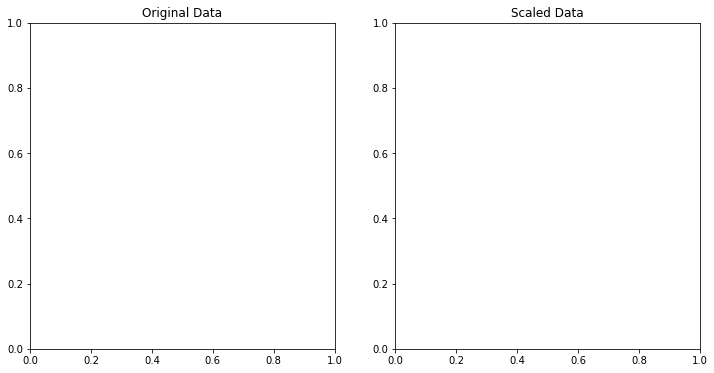

In [9]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["year"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["size"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [ ]:
plt.show()